## 계단 오르내리기 예제

### Python

In [ ]:
import random

position = 0
walk = [position]

nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

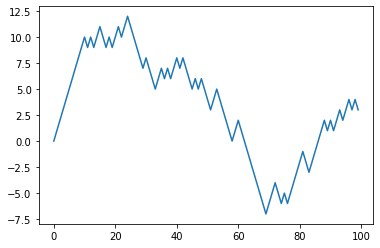

In [ ]:
import matplotlib.pyplot as plt

plt.plot(walk[:100])

### Numpy

In [2]:
import numpy as np

nsteps = 1000

rng = np.random.default_rng(seed=54321)
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)

walk = steps.cumsum()

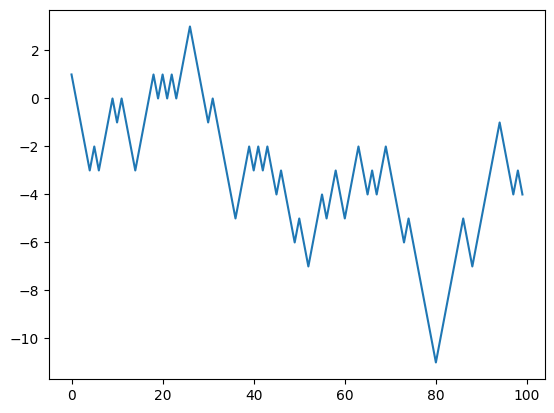

In [3]:
import matplotlib.pyplot as plt

plt.plot(walk[:100])

In [4]:
print("min:", walk.min())
print("max:", walk.max())

min: -22
max: 17


In [5]:
print("처음으로 10칸 떨어진 step:", (np.abs(walk) >= 10).argmax())

처음으로 10칸 떨어진 step: 79


In [6]:
# Run 5000 times

nwalks = 5000
nsteps = 1000

draws = rng.integers(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)

walks = steps.cumsum(axis=1)
walks

array([[  1,   2,   3, ...,  44,  43,  42],
       [ -1,   0,  -1, ...,  32,  31,  32],
       [  1,   0,   1, ...,  -2,  -1,   0],
       ...,
       [  1,   2,   3, ..., -24, -23, -24],
       [ -1,  -2,  -3, ...,  26,  25,  26],
       [ -1,   0,  -1, ...,  30,  31,  32]])

In [7]:
print("min:", walks.min())
print("max:", walks.max())

min: -102
max: 113


In [8]:
# 30칸 이상이 떨어진 step들
hits30 = (np.abs(walks) >= 30).any(axis=1)
print(hits30)
print("30칸 이상 떨어진 step 개수:", hits30.sum())

[ True  True  True ...  True  True  True]
30칸 이상 떨어진 step 개수: 3398


In [9]:
# 처음으로 30칸 이상 떨어진 step
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
print(crossing_times)
print("각 walk 별, 처음으로 30칸 떨어진 step 평균:", crossing_times.mean())

[515 513 267 ... 295 251 925]
각 walk 별, 처음으로 30칸 떨어진 step 평균: 507.4973513831666


In [1]:
## test 입니당